# 1 - Introduction

**Credit by  :** 
  - Enggar Kristian 
  - Wahyudi

**Batch : FTDS - 012** 

**Objective : Final project, to predict sentiment analysis Twitter**

# 2 - Import Libraries

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# masuk folder "model_ml_dl"
% cd /content/gdrive/MyDrive/model_dl_ml

/content/gdrive/MyDrive/model_dl_ml


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_validate
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler

# Evaluate Classification Models
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer # to create Bag of words


# import library Tensorflow
import tensorflow as tf 
from tensorflow import keras
import pathlib
!pip install -q pysastrawi
np.random.seed(15)
tf.random.set_seed(15)
import re # for preprocessing text
import string # for preprocessing text
import nltk # for processing texts
from nltk.corpus import stopwords # list of stop words
from wordcloud import WordCloud,STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.layers import Dense, Conv1D, GlobalAveragePooling1D, MaxPooling1D, Input, LSTM, GRU, SpatialDropout1D, Dense, Dropout, Masking, Embedding, Flatten, Input, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

!pip install -q pysastrawi
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 210 kB 5.2 MB/s 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
tf.__version__

'2.8.2'

In [5]:
sklearn.__version__

'1.0.2'

# 3 - Data Loading

In [14]:
data = pd.read_csv("/content/gdrive/MyDrive/model_dl_ml/auto_reply.csv")
data.head()

,Unnamed: 0,sentimen,text
0,0.0,Positive,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...
1,1.0,Positive,|@Msdebramaye Saya mendengar tentang kontes it...
2,2.0,Positive,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...
3,3.0,Positive,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...
4,4.0,Positive,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...


This dataset is created by us, which is where we collect all the Indonesian language sentiment analysis datasets from Kaggle. Then subtitute them into one and model them with tensorflow and become a Sentiment Analysis model.

In [15]:
# Size
data.shape

(13946, 3)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13946 entries, 0 to 13945
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3708 non-null   float64
 1   sentimen    13946 non-null  object 
 2   text        13946 non-null  object 
dtypes: float64(1), object(2)
memory usage: 327.0+ KB


There's anomaly data the name si Unnamed: 0, we will drop later

In [17]:
# Know about unique all columns in dataset
for col in data:
    print(f'{col}: {data[col].unique()}')

Unnamed: 0: [0.000e+00 1.000e+00 2.000e+00 ... 3.706e+03 3.707e+03       nan]
sentimen: ['Positive' 'Neutral' 'Negative' 'negative']
text: ['|@PrincessSuperC Hai Cici tersayang! Cuma mau memberitaukan kalau saya cinta kamu! OH! Dan akan berkunjung secepatnya? Fantasi berkendari 5 Mei!!!!|'
 '|@Msdebramaye Saya mendengar tentang kontes itu! Selamat teman!!|'
 '|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DISANA!! SANGAT SERU!!!!!! Ini adalah yang terbaik...yang pernah ada http://tinyurl.com/49955t3|'
 ...
 'Sudah sampai kabupaten sebelah kawan... Mari kita terapkan sosial distancing yang sudah di anjurkan pemerintah... Dalam upaya memutus Mata rantai pemularan covid 19... Anda di rumah saja yaa kawan....untuk kita, untuk semua, untuk Indonesia pic.twitter.com/fJEwCq5UG6'
 'Berharap pemerintah Indonesia segara menutup penerbangan Internasional untuk mencegah COVID-19. #DiRumahAjaYa ##COVID19'
 'Apapun agama dan kepercayaanmu, sblum tidur, yuk doakan mereka yg dalam prwatan COVID-19, nakes

In [19]:
# Copy dataset that can use to modification dataset 
data_copy = data

In [20]:
# drop column Unnamed: 0
data_copy = data_copy.drop(columns=["Unnamed: 0"], axis=1) 
data_copy.tail()

,sentimen,text
13941,Neutral,Semoga KTT luar biasa memberikan manfaat bg In...
13942,Negative,1. Corona sudah menyerang di berbagai Negative...
13943,Positive,Sudah sampai kabupaten sebelah kawan... Mari k...
13944,Neutral,Berharap pemerintah Indonesia segara menutup p...
13945,Positive,"Apapun agama dan kepercayaanmu, sblum tidur, y..."


In [21]:
# Query data without unique 'negative' in column sentimen

data_copy = data_copy[data_copy['sentimen']!='negative']

# 4 - Exploratory Data Analysis (EDA)

In [22]:
data_copy['sentimen'].value_counts()

Positive    6218
Negative    5764
Neutral     1962
Name: sentimen, dtype: int64

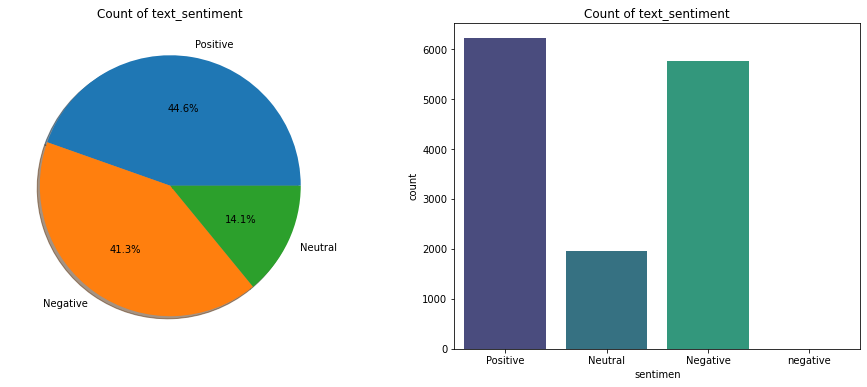

In [23]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data_copy['sentimen'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('Count of Text Sentiment')
ax[0].set_title('Count of text_sentiment')
ax[0].set_ylabel('')
sns.countplot('sentimen',data=data,ax=ax[1], palette = 'viridis')
ax[1].set_title('Count of text_sentiment')
plt.show()

As we can see from the graph we have 3 labels positive, neutral, and negative. they are imbalance with neutral label.

# 5 - Data Preprocessing

## Clean text


In this Natural Language Program, the data is tabular which contains text and sentiment labels. The text will be cleaned of annoying noise such as punctuation marks, numbers, special words, links, and others. So below I will do data cleaning.

In [ ]:
# let's take a sample one text
data_copy['text'][5000]


'Kita perlu yakin kepada kewibawaan SPRM untuk menyelesaikan tanggungjawab mereka dan saya percaya kalau ada kes, kes tersebut akan diserahkan kepada pihak Peguam Negara.'

In [ ]:
def clean_text(text):
  '''
  DESCRIPTION:
  This function to clean text 
  INPUT: 
  text: string
  OUTPUT: 
  text: string after clean it
  ''' 
  text = text.lower() # convert letters to lower case
  text = re.sub("@[A-Za-z0-9_]+"," ", text) #r emove mention
  text = re.sub("#[A-Za-z0-9_]+"," ", text) # remove hashtag
  text = re.sub(r"\\n"," ",text) # remove \n or enter
  text = re.sub("[^a-zA-Z]", " ", text) # remove non-letters
  text = re.sub(r'\d+', '', text) # remove number
  text = re.sub(r'http\S+', '', text) # remove links
  text = re.sub(r"www.\S+", " ", text) # remove link
  text = re.sub("rt"," ",text) # remove RT
  text = text.translate(str.maketrans('','', string.punctuation)) # remove punctuation
  text = re.sub(' +', ' ',text) # remove extra space
  text = text.strip() # remove whitespaces

  # remove stopwords
  stpwds_id = list(set(stopwords.words('indonesian')))
  stpwds_id.append('oh')

  tokens = word_tokenize(text)

  text = ' '.join([word for word in tokens if word not in stpwds_id])

  # Stemming
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = stemmer.stem(text)

  return text

- Create functions with regex to convert letters to lowercase, remove numbers, punctuation marks, special words, links, stickers and others. so that the machine can read a text one by one word from a sentence which later the word is converted into numbers.

- Then use stopwords, which is to eliminate affixes that often appear in English if the machine doesn't need to train it or you could say it reduces words to make the machine work more efficiently.

- After removing noise by regex and reducing words with stopwords, word tokenize is done to make a sentence into a vector per word.

- And be a function for cleaning text that serves to add results from training data created by deep learning models.

In [ ]:
%%time
# The cleaning function applied in all reviews
data_copy['text_processed'] = data_copy['text'].apply(lambda x: clean_text(x))


CPU times: user 1min 47s, sys: 1.57 s, total: 1min 49s
Wall time: 1min 48s


Apply function to dataset

In [ ]:
data_copy['text_processed'][5000]

'wibawa sprm selesai tanggungjawab percaya kes kes serah peguam negara'

Well all text it should be clean from regex, and stopwords library.

In [ ]:
data_copy.sentimen.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
data_copy['label'] = data_copy['sentimen'].replace({'Neutral' : 0, 'Negative' : 1, 'Positive' : 2})
data_copy

,sentimen,text,text_processed,label
0,Positive,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...,2
1,Positive,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman,2
2,Positive,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik h...,2
3,Positive,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...,2
4,Positive,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif t co dxwujk g,2
...,...,...,...,...
13941,Neutral,Semoga KTT luar biasa memberikan manfaat bg In...,moga ktt manfaat bg indonesia dlm bentuk ringa...,0
13942,Negative,1. Corona sudah menyerang di berbagai Negative...,corona serang negativeara perintah indonesia r...,1
13943,Positive,Sudah sampai kabupaten sebelah kawan... Mari k...,kabupaten belah kawan mari terap sosial distan...,2
13944,Neutral,Berharap pemerintah Indonesia segara menutup p...,harap perintah indonesia segara tutup terbang ...,0


Replace the label be a numeric from categorical:
- Neutral = 0
- Negative = 1
- Positive = 2


## Splitting Dataset

In [ ]:
# random state
random_state=5

# Splitting dataset
X_train_full, X_test,  y_train_full, y_test = train_test_split(data_copy.text_processed,
                                                               data_copy.label,
                                                               test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  test_size=0.33, random_state=random_state)

print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (7473,)
Validation data shape: (3682,)
Testing data shape: (2789,)


## Oversampling with RandomOverSampler

In [ ]:
ros = RandomOverSampler()
X_train_balanced, y_train_balanced = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
X_val_balanced, y_val_balanced = ros.fit_resample(np.array(X_val).reshape(-1, 1), np.array(y_val).reshape(-1, 1));

print('X_train shape berfore oversampling :', X_train.shape)
print('y_train shape berfore oversampling :', y_train.shape)
print('X_val shape berfore oversampling   :', X_val.shape)
print('y_val shape berfore oversampling   :', y_val.shape)

X_train shape berfore oversampling : (7473,)
y_train shape berfore oversampling : (7473,)
X_val shape berfore oversampling   : (3682,)
y_val shape berfore oversampling   : (3682,)


In [ ]:
# print shape after oversampling
print('X_train_balanced shape after oversampling:', X_train_balanced.shape)
print('y_train_balanced shape after oversampling:', y_train_balanced.shape)
print('X_val_balanced shape after oversampling:', X_val_balanced.shape)
print('y_val_balanced shape after oversampling:', y_val_balanced.shape)

X_train_balanced shape after oversampling: (9900, 1)
y_train_balanced shape after oversampling: (9900,)
X_val_balanced shape after oversampling: (4977, 1)
y_val_balanced shape after oversampling: (4977,)


## Embedding Layer in Deep Learning with Tensorflow

In [ ]:
# Want to know how many vocab and maximum words in a text
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Length vocab:",total_vocab)
print("Length Maximum Text:",max_sen_len,"words")

Length vocab: 2059
Length Maximum Text: 67 words


- Want to know size of total vocabulary that will be to input shape in model definition
- Well there is 2559 vocabulary in dataset and theres 33  words in one text in the dataset.

In [ ]:
# define vocab than convert to numeric
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # if i want to use sequential API
                                       )

text_vectorization.adapt(X_train) # adapt looks like fit

In [ ]:
# let's check the result vectorization
data_copy.text_processed[12121]

'sdr perintah tni polri media sdng focus putus rantai tular covid saran sy sdr baik bekerjasamalah dgn dgn elemen negativeara utk putus tular covid indonesia'

In [ ]:
# after convert it
text_vectorization([data_copy.text_processed[0]])

<tf.Tensor: shape=(1, 67), dtype=int64, numpy=
array([[   1,    1,  533,    1,  725, 1439,  185,    1,    1, 1570,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]])>

In [ ]:
# Change the numerical to weight with embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=256,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [ ]:
# see the result
emb_res = embedding(text_vectorization([data_copy.text_processed[50]]))
emb_res

<tf.Tensor: shape=(1, 67, 256), dtype=float32, numpy=
array([[[-0.04181858, -0.00717924,  0.0276329 , ...,  0.01790755,
          0.01362551,  0.04527469],
        [ 0.02502057, -0.00849206,  0.01966036, ...,  0.04785338,
         -0.03058391, -0.02618172],
        [-0.00306284, -0.03073263, -0.00417976, ...,  0.01878656,
         -0.00145379, -0.01121069],
        ...,
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061],
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061],
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061]]], dtype=float32)>

Dataset has converted. Embedding looks like scaling in feature engineering. 

In [ ]:
# let's check weight word "bulls"
emb_res[0][10]

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([ 0.00122008,  0.03954642, -0.02284892,  0.02267828, -0.0412886 ,
       -0.03869846, -0.0371687 ,  0.01441881, -0.0343393 ,  0.0218263 ,
        0.00154731, -0.04341732,  0.0322243 ,  0.04115373, -0.03265741,
       -0.00947789, -0.04907118,  0.04014585, -0.01852617,  0.02275989,
        0.01355273,  0.04051456,  0.04861584,  0.02533307,  0.02844546,
        0.01379564,  0.0097808 ,  0.03306079,  0.02393867,  0.04150773,
       -0.00572969, -0.00797009, -0.03834816, -0.03572985, -0.02517613,
        0.00631214, -0.01538836, -0.04486803, -0.02786158,  0.04784994,
        0.03359933, -0.04160787, -0.0214233 ,  0.0281121 , -0.01917952,
        0.04841168,  0.01187217, -0.0009694 , -0.02563374, -0.04979267,
        0.02135969, -0.04423647, -0.00548268, -0.04225801,  0.00301229,
       -0.01829486,  0.02365687, -0.03737084,  0.03253884,  0.03520503,
        0.0182194 , -0.038328  ,  0.02859956,  0.00451372,  0.02783861,
        0.022424

well define the weight with embedding for each word in 256 dimensions.

## Get Dummies

Before we modeling, we will do dummy the target, this is looks like onehotencoder with manual coding. Labels will be a features after dummy according to its uniqueness, if a certain line is detected, the label will contain a value of 1

In [ ]:
# convert label
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_train_balanced_ohe = to_categorical(y_train_balanced)
y_val_balanced_ohe = to_categorical(y_val_balanced)

y_test_ohe = to_categorical(y_test)

y_train_ohe

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

The result will be an array.

In [ ]:
# if we looks in dataframe will be like this
pd.get_dummies(y_train)

,0,1,2
2432,0,1,0
10516,1,0,0
11430,0,1,0
2500,0,1,0
9923,0,1,0
...,...,...,...
1548,0,1,0
8837,0,0,1
13064,1,0,0
12815,0,0,1


There are 3 uniques in column 'label' so will be define 3 features in dataframe.

# 6 - Model Training

## Model Gru

In [ ]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GRU(32))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_gru_hist_1 = model.fit(X_train_balanced,
                         y_train_balanced_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/50
310/310 [==============================] - 6s 11ms/step - loss: 1.1010 - accuracy: 0.3264 - val_loss: 1.0974 - val_accuracy: 0.4052
Epoch 2/50
310/310 [==============================] - 2s 8ms/step - loss: 1.0996 - accuracy: 0.3264 - val_loss: 1.0930 - val_accuracy: 0.4052
Epoch 3/50
310/310 [==============================] - 2s 8ms/step - loss: 1.0993 - accuracy: 0.3219 - val_loss: 1.0924 - val_accuracy: 0.4052
Epoch 4/50
310/310 [==============================] - 2s 8ms/step - loss: 1.0990 - accuracy: 0.3375 - val_loss: 1.1045 - val_accuracy: 0.1434
Epoch 5/50
310/310 [==============================] - 2s 8ms/step - loss: 1.0991 - accuracy: 0.3218 - val_loss: 1.0974 - val_accuracy: 0.4052
Epoch 6/50
310/310 [==============================] - 2s 8ms/step - loss: 1.0990 - accuracy: 0.3252 - val_loss: 1.0971 - val_accuracy: 0.4052
Epoch 7/50
310/310 [==============================] - 2s 8ms/step - loss: 1.0986 - accuracy: 0.3397 - val_loss: 1.1157 - val_accuracy: 0.1434
Epoch

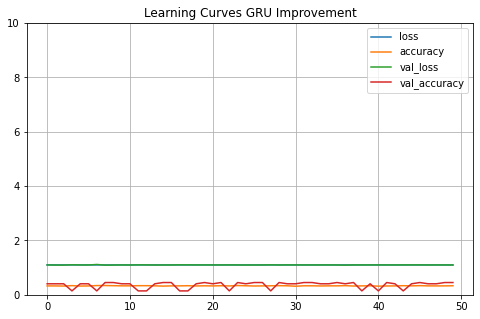

In [ ]:
pd.DataFrame(model_gru_hist_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves GRU Improvement")
plt.show()

First our model tensorflow with Gru, with this model is bad result for data inference base on graph learning curve.

In [ ]:
model.evaluate(X_test, y_test_ohe, batch_size=64)

44/44 [==============================] - 0s 5ms/step - loss: 1.0971 - accuracy: 0.4514


[1.0970852375030518, 0.4514162838459015]

In [ ]:
yp_seq_gru_imp = model.predict(X_test)
yp_seq_gru_imp[:20]

array([[0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.33191708, 0.33155793, 0.33652502],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493],
       [0.3319171 , 0.33155793, 0.33652493]], dtype=float32)

In [ ]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_gru_imp = yp_seq_gru_imp.argmax(axis=1)
print('Classification Report (Model Sequential Improvement LSTM)')
print(classification_report(y_test, res_argmax_gru_imp, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential Improvement LSTM)
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00       400
    Negative       0.00      0.00      0.00      1130
    Positive       0.45      1.00      0.62      1259

    accuracy                           0.45      2789
   macro avg       0.15      0.33      0.21      2789
weighted avg       0.20      0.45      0.28      2789



Wow, it turns out that the results are very bad, the model can only predict the Positive label for this dataset, so it is true from the learning curve graph where the graph shows bad results. 

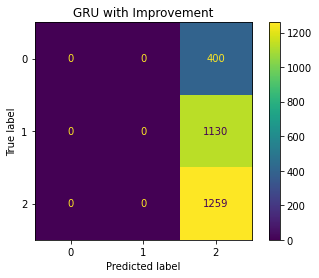

In [ ]:
cm = confusion_matrix(y_test, res_argmax_gru_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("GRU with Improvement")
plt.show()

Of course the model just know label positive, so they just can predict label positive only.

## Model LSTM x Conv1D x DNN

In [ ]:
model_lstm_1_imp = Sequential()
model_lstm_1_imp.add(text_vectorization)
model_lstm_1_imp.add(embedding)
model_lstm_1_imp.add(Conv1D(64, 5, activation='relu'))
model_lstm_1_imp.add(MaxPooling1D(pool_size=4))
model_lstm_1_imp.add(LSTM(64))
model_lstm_1_imp.add(Dense(256,activation='relu', kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
model_lstm_1_imp.add(BatchNormalization())
model_lstm_1_imp.add(Dropout(0.5))
model_lstm_1_imp.add(Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
model_lstm_1_imp.add(BatchNormalization())
model_lstm_1_imp.add(Dropout(0.5))
model_lstm_1_imp.add(Dense(3,activation='softmax'))

model_lstm_1_imp.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    metrics='accuracy')

In [ ]:
%%time
model_lstm_hist_1_imp = model_lstm_1_imp.fit(X_train_balanced,
                         y_train_balanced_ohe, 
                         batch_size=64,
                         epochs=200,
                         shuffle=True,
                         validation_data=(X_val_balanced, y_val_balanced_ohe))

Epoch 1/200
155/155 [==============================] - 6s 14ms/step - loss: 121.1660 - accuracy: 0.3693 - val_loss: 117.9967 - val_accuracy: 0.3333
Epoch 2/200
155/155 [==============================] - 2s 10ms/step - loss: 115.7283 - accuracy: 0.4155 - val_loss: 112.7738 - val_accuracy: 0.3420
Epoch 3/200
155/155 [==============================] - 2s 10ms/step - loss: 110.3536 - accuracy: 0.5344 - val_loss: 107.7627 - val_accuracy: 0.4368
Epoch 4/200
155/155 [==============================] - 2s 10ms/step - loss: 105.2808 - accuracy: 0.6307 - val_loss: 102.9687 - val_accuracy: 0.5646
Epoch 5/200
155/155 [==============================] - 2s 10ms/step - loss: 100.4630 - accuracy: 0.7009 - val_loss: 98.4579 - val_accuracy: 0.6219
Epoch 6/200
155/155 [==============================] - 2s 10ms/step - loss: 95.8795 - accuracy: 0.7425 - val_loss: 94.0944 - val_accuracy: 0.6233
Epoch 7/200
155/155 [==============================] - 2s 10ms/step - loss: 91.5050 - accuracy: 0.7709 - val_loss: 

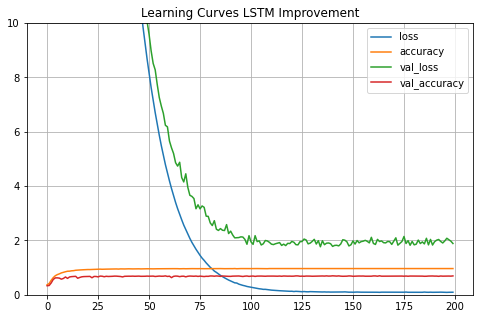

In [ ]:
pd.DataFrame(model_lstm_hist_1_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves LSTM Improvement")
plt.show()

This is our second research for combination model with Convolutional 1 Dimension, Deep Neural Networks with MaxPooling1D, and Long Short-Term Memory. Produces very good graphics, which in these 200 epochs the loss and validation loss continues to decrease, and the accuracy results are fixed and good.

In [ ]:
model_lstm_1_imp.evaluate(X_test, y_test_ohe, batch_size=64)

44/44 [==============================] - 0s 5ms/step - loss: 1.5500 - accuracy: 0.7221


[1.5500236749649048, 0.7221226096153259]

In [ ]:
yp_seq_lstm_imp = model_lstm_1_imp.predict(X_test)
yp_seq_lstm_imp[:20]

array([[9.4825369e-01, 2.6630941e-03, 4.9083140e-02],
       [6.8790774e-04, 1.2324503e-01, 8.7606710e-01],
       [1.6203783e-05, 1.7925038e-04, 9.9980456e-01],
       [9.9988282e-01, 7.8730802e-05, 3.8375048e-05],
       [9.1520633e-05, 2.5138803e-04, 9.9965703e-01],
       [1.0717102e-02, 8.1901205e-01, 1.7027090e-01],
       [4.6726855e-05, 9.9981862e-01, 1.3473841e-04],
       [5.4025797e-05, 9.9975294e-01, 1.9306316e-04],
       [1.0717102e-02, 8.1901205e-01, 1.7027090e-01],
       [3.4284050e-04, 7.1227713e-04, 9.9894494e-01],
       [1.8054356e-03, 1.1159250e-03, 9.9707866e-01],
       [1.6927336e-03, 1.0690909e-03, 9.9723816e-01],
       [2.4893618e-04, 9.9607581e-01, 3.6752317e-03],
       [9.4685942e-01, 9.8265307e-03, 4.3314058e-02],
       [9.9998820e-01, 6.0201210e-06, 5.6961489e-06],
       [1.7395183e-04, 5.2316580e-03, 9.9459440e-01],
       [1.0760567e-04, 9.9903452e-01, 8.5784472e-04],
       [1.8962188e-05, 1.8191717e-04, 9.9979919e-01],
       [1.3428596e-05, 1.103

In [ ]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_lstm_imp = yp_seq_lstm_imp.argmax(axis=1)
print('Classification Report (Model Sequential Improvement LSTM)')
print(classification_report(y_test, res_argmax_lstm_imp, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential Improvement LSTM)
              precision    recall  f1-score   support

     Neutral       0.61      0.59      0.60       400
    Negative       0.72      0.76      0.74      1130
    Positive       0.75      0.73      0.74      1259

    accuracy                           0.72      2789
   macro avg       0.70      0.69      0.69      2789
weighted avg       0.72      0.72      0.72      2789



Yess, model have good result base on classification report, after we do improvement with combination model and we did oversampling, have goodfit result, although the distribution of neutral labels is a little bit but the model learns it well. 

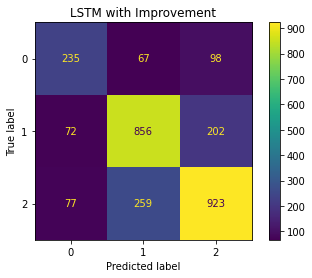

In [ ]:
cm = confusion_matrix(y_test, res_argmax_lstm_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("LSTM with Improvement")
plt.show()

The model still bias base on accuracy just 72% 

# 7 - Saving Model

Base on result we use model combination for data inference.

In [ ]:
# freeze model
for layer in model_lstm_1_imp.layers:
  layer.trainable = False


In [ ]:
# prepare directory for saving model
model_lstm_1_imp.save('model_auto_reply_tf')


INFO:tensorflow:Assets written to: model_auto_reply_tf/assets


INFO:tensorflow:Assets written to: model_auto_reply_tf/assets


# 8 - Model Inference

Based on the classification report, the model that gets the best accuracy is the Model LSTM x Conv1D x DNN after improvement. So I will decide to use the Model LSTM x Conv1D x DNN for data inference later so that the model can predict sentiment correctly and better, but it is not perfect.

In [ ]:
model_auto_reply_tf = tf.keras.models.load_model('model_auto_reply_tf')

In [ ]:
twt = ["banknya jelek banget sih"]

sentiment = model_auto_reply_tf.predict(twt)
if(np.argmax(sentiment) == 0):
    print("Neutral")
elif(np.argmax(sentiment) == 1):
    print("Negative")
elif(np.argmax(sentiment) == 2):
    print("Positive")

Negative


Models work fine!